In [1]:
import cv2 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2023-12-15 20:52:24.741894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 20:52:24.741971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 20:52:24.742976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 20:52:24.748844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 20:52:25.493492: W tensorflow/compiler/tf2

In [2]:

# Load the image
image_path = './inputs/image.jpg'
image = cv2.imread(image_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale (required for the face detector)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

cropped_face = None
# Check if any faces are detected
if len(faces) > 0:
    # Assume the first face is the primary face (you can modify this logic as needed)
    x, y, w, h = faces[0]

    # Crop the face from the image
    cropped_face = image[y:y + h, x:x + w]
else:
    print("No faces detected in the image.")



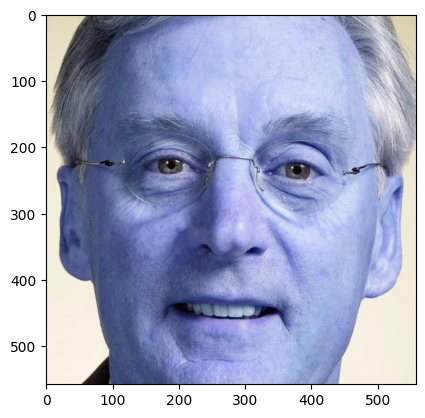

In [3]:
gray_image = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)

plt.imshow(cropped_face)

In [4]:
# Load the SavedModel
loaded_model = tf.keras.models.load_model('./saved_model/')
gray_image = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
prediction = loaded_model.predict(cv2.resize(gray_image, (200, 200)).reshape(1, 200, 200, 1))
predicted_age = np.argmax(prediction)
print(f'Predicted Age: {predicted_age}')

2023-12-15 20:52:26.556968: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-15 20:52:26.580846: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-15 20:52:26.580898: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-15 20:52:26.581564: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-15 20:52:26.581609: I external/local_xla/xla/stream_executor

1/1 [==============================] - 0s 439ms/step
Predicted Age: 5
